# Airbnb Price Predictor Project
### Using the power of python and machine learning we will gather information of all listings within the country of the United States of America in order to develop a machine learning model that will help predict the price of the listing

#### information gathered from http://insideairbnb.com/get-the-data.html

### First we import the dependencies

In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Next we navigate to the proper folder within our machine

In [3]:
os.getcwd()

'C:\\Users\\brenden.lemay'

In [4]:
os.chdir('./Downloads/Airbnb Data')

### Now we import our data utilizing a glob object and a list comprehension

In [5]:
filenames = glob('./listings*.csv')
dataframes = [pd.read_csv(f) for f in filenames]


In [6]:
type(dataframes)

list

In [7]:
dataframes[0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,50,1,138,2020-02-16,1.17,1,9
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,765,1,108,2020-03-15,1.01,11,323
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.83,2,297
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,99,1,244,2020-06-22,2.25,7,180
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,65,1,67,2020-01-01,0.63,7,0


###### Here we can see that we have a list of DataFrames. We need to get these into one DataFrame in order to begin wrangling our data

In [8]:
df = pd.DataFrame()
for frame in dataframes:
    df = df.append(frame)

In [9]:
df.shape

(251743, 16)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,50,1,138,2020-02-16,1.17,1,9
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,765,1,108,2020-03-15,1.01,11,323
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.83,2,297
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,99,1,244,2020-06-22,2.25,7,180
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,65,1,67,2020-01-01,0.63,7,0


In [155]:
# Need to drop duplicates since I'm pretty sure I donwloaded Austin's data more than once
df = df.drop_duplicates().reset_index(drop=True)

In [153]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079,
            11080],
           dtype='int64', length=249685)

In [12]:
df.shape

(249685, 16)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
os.chdir('./GZ Files')

In [15]:
zip_filenames = glob('./listings*.csv.gz')


In [16]:
zip_df = pd.DataFrame()
for file in zip_filenames:
    zip_df = zip_df.append(pd.read_csv(file, compression='infer'))

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
zip_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [18]:
zip_df.shape

(250720, 106)

In [19]:
# Need to drop duplicates since I'm pretty sure I donwloaded Austin's data more than once
zip_df.drop_duplicates(inplace=True)

In [20]:
# GZ files shape
zip_df.shape

(247280, 106)

In [21]:
# CSV files shape
df.shape

(249685, 16)

In [22]:
common_cols = ['name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
               'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [23]:
# Dropping common columns in order to avoid the _x and _y columns
trimmed = zip_df.drop(columns=common_cols)

In [24]:
trimmed.shape

(247280, 92)

#### Now that we have our two DataFrames, we need to join the two in order to get access to all the columns available

In [25]:
outer = pd.merge(df, trimmed, how='right', on='id')

In [157]:
outer.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            262646, 262647, 262648, 262649, 262650, 262651, 262652, 262653,
            262654, 262655],
           dtype='int64', length=261944)

In [26]:
outer.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       ...
       'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object', length=107)

In [27]:
outer.shape

(262656, 107)

In [28]:
outer.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,scrape_id,last_scraped,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,50,1,138,2020-02-16,1.17,1,9,https://www.airbnb.com/rooms/38585,20200625032333,2020-06-25,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,I can lend you a yoga mat or you can go to our...,"You need a car, but UBER and Lyft are availabl...",Safe parking in our driveway. You also have fu...,"I love entertaining, enjoy chatting with guest...",This list is based on previous experiences: * ...,NaN,NaN,https://a0.muscache.com/im/pictures/216165/755...,NaN,https://www.airbnb.com/users/show/165529,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",NaN,NaN,93%,t,https://a0.muscache.com/im/users/165529/profil...,https://a0.muscache.com/im/users/165529/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Asheville, NC, United States",28804,NaN,Asheville,NC,28804,North Carolina Mountains,"Asheville, NC",US,United States,t,House,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,NaN,NaN,$150.00,$0.00,1,$15.00,3,1,1,3,3,1.0,3.0,6 weeks ago,t,0,0,9,2020-06-25,10,2010-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",f,f,moderate,t,t,0,1,0
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,765,1,108,2020-03-15,1.01,11,323,https://www.airbnb.com/rooms/80905,20200625032333,2020-06-25,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",there is Apple TV not cable TV (there is no op...,Park your car and walk anywhere and everywhere...,NaN,I am easily accessible and available if you ne...,THE GUEST WHO BOOKS AGREES TO: • Be present at...,NaN,NaN,https://a0.muscache.com/im/pictures/29807425/6...,NaN,https://www.airbnb.com/users/show/427027,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville S

In [29]:
outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262656 entries, 0 to 262655
Columns: 107 entries, id to calculated_host_listings_count_shared_rooms
dtypes: float64(21), int64(22), object(64)
memory usage: 216.4+ MB


In [30]:
outer.to_csv('Merged Air BnB Listings.csv')

In [31]:
# Need a different way to get a count of nulls held in columns
for col in outer:
    print(col, outer[col].isna().sum())

id 0
name 29
host_id 0
host_name 134
neighbourhood_group 144935
neighbourhood 0
latitude 0
longitude 0
room_type 0
price 0
minimum_nights 0
number_of_reviews 0
last_review 53447
reviews_per_month 53447
calculated_host_listings_count 0
availability_365 0
listing_url 0
scrape_id 0
last_scraped 0
summary 9890
space 58797
description 5758
experiences_offered 0
neighborhood_overview 84274
notes 129174
transit 95006
access 109012
interaction 91441
house_rules 83335
thumbnail_url 262656
medium_url 262656
picture_url 0
xl_picture_url 262656
host_url 0
host_since 134
host_location 712
host_about 89886
host_response_time 83821
host_response_rate 83821
host_acceptance_rate 45643
host_is_superhost 134
host_thumbnail_url 134
host_picture_url 134
host_neighbourhood 67149
host_listings_count 134
host_total_listings_count 134
host_verifications 0
host_has_profile_pic 134
host_identity_verified 134
street 0
neighbourhood_cleansed 0
neighbourhood_group_cleansed 144935
city 168
state 73
zipcode 1965
mark

In [32]:
outer.drop(['square_feet','host_thumbnail_url','host_url','xl_picture_url','picture_url', 
            'medium_url','thumbnail_url','listing_url','country_code','country','weekly_price','monthly_price']
           , axis=1,inplace=True)

In [34]:
outer.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [35]:
outer.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,scrape_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,2.626560e+05,2.626560e+05,262656.000000,2.626560e+05,262656.000000,209209.000000,262656.000000,262656.000000,2.626560e+05,262522.000000,262522.000000,262656.000000,262420.000000,262195.000000,260866.000000,262656.000000,2.626560e+05,2.626560e+05,2.626560e+05,2.626560e+05,2.626560e+05,2.626560e+05,2.626560e+05,262656.000000,262656.000000,262656.000000,262656.000000,206324.000000,205970.000000,205991.000000,205910.000000,205976.000000,205889.000000,205883.000000,262656.000000,262656.000000,262656.000000
mean,2.494341e+07,8.984199e+07,266.284414,3.896152e+02,34.347770,1.458536,14.561145,153.109900,2.020065e+13,51.888546,51.888546,4.036230,1.443989,1.552387,2.175354,2.058933,3.424309e+04,3.894005e+02,3.941546e+02,2.306020e+05,7.456997e+05,3.930157e+02,7.206498e+05,12.304154,27.504637,43.969599,10.203601,95.005554,9.692446,9.513586,9.795338,9.777974,9.720184,9.491196,12.487105,1.424704,0.262644
std,1.285779e+07,9.408719e+07,795.220788,1.951220e+05,63.076655,1.690128,40.534805,139.454749,5.802091e+07,230.205004,230.205004,2.844319,0.863755,1.170091,1.974237,2.051507,8.385098e+06,1.951220e+05,1.951220e+05,2.217316e+07,3.996620e+07,1.951220e+05,3.892291e+07,12.708340,25.132304,37.338327,16.824450,8.060641,0.789469,0.918584,0.687765,0.722285,0.681619,0.873056,39.134211,6.032677,2.726490
min,1.090000e+02,2.300000e+01,0.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000,2.020052e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,1.501010e+07,1.292539e+07,75.000000,1.000000e+00,1.000000,0.250000,1.000000,0.000000,2.020061e+13,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+01,1.000000e+00,2.000000e+00,9.000000e+01,9.000000e+01,1.300000e+00,9.000000e+01,0.000000,0.000000,0.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,2.529632e+07,5.030623e+07,125.000000,2.000000e+00,8.000000,0.830000,2.000000,128.000000,2.020062e+13,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.124000e+03,2.000000e+00,3.000000e+00,1.125000e+03,1.125000e+03,2.100000e+00,1.125000e+03,7.000000,27.000000,49.000000,2.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000
75%,3.673115e+07,1.439690e+08,220.000000,5.000000e+00,39.000000,2.120000,6.000000,302.000000,2.020071e+13,7.000000,7.000000,5.000000,2.000000,2.000000,3.000000,2.000000,1.125000e+03,5.000000e+00,7.000000e+00,1.125000e+03,1.125000e+03,5.000000e+00,1.125000e+03,27.000000,56.000000,84.000000,14.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,1.000000,0.000000
max,4.431889e+07,3.569385e+08,25000.000000,1.000000e+08,951.000000,50.290000,393.000000,365.000000,2.020073e+13,3408.000000,3408.000000,48.000000,50.000000,37.000000,132.000000,48.000000,2.147484e+09,1.000000e+08,1.000000e+08,2.147484e+09,2.147484e+09,1.000000e+08,2.147484e+09,30.000000,60.000000,90.000000,582.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000

In [36]:
#Calculate the correlation coefficients
corr = outer.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

##### create lists of dataframe columns and plot the information in the df[lists]

In [37]:
outer.iloc[:,:20].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,scrape_id,last_scraped,summary,space,description,experiences_offered
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,Private room,50,1,138,2020-02-16,1.17,1,9,20200625032333,2020-06-25,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none
1,80905,French Chic Loft,427027,Celeste,NaN,28801,Entire home/apt,765,1,108,2020-03-15,1.01,11,323,20200625032333,2020-06-25,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,Entire home/apt,75,30,89,2019-11-30,0.83,2,297,20200625032333,2020-06-25,Walk to town in ten minutes! Monthly rental in...,True Asheville...artist styled apartment with ...,Walk to town in ten minutes! Monthly rental in...,none
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,Entire home/apt,99,1,244,2020-06-22,2.25,7,180,20200625032333,2020-06-25,NaN,Private cottage located behind the main house ...,Private cottage located behind the main house ...,none
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,Private room,65,1,67,2020-01-01,0.63,7,0,20200625032333,2020-06-25,NaN,Private Rooms at Bon Paul and Sharky's Hostel....,Private Rooms at Bon Paul and Sharky's Hostel....,none


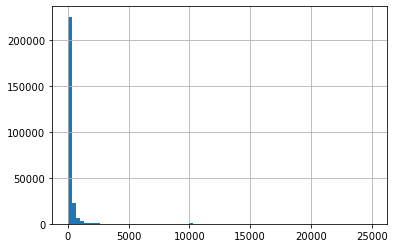

In [38]:
outer.price.hist(bins=75)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

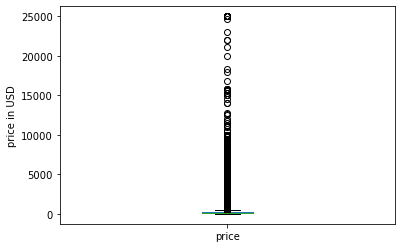

In [39]:
outer.price.plot(kind='box')
plt.ylabel('price in USD')
plt.show

In [40]:
price= outer[['price']]
price.describe()

,price
count,262656.000000
mean,266.284414
std,795.220788
min,0.000000
25%,75.000000
50%,125.000000
75%,220.000000
max,25000.000000


In [41]:
rooms = outer['room_type']
rooms.value_counts()

Entire home/apt    180151
Private room        75632
Shared room          4754
Hotel room           2119
Name: room_type, dtype: int64

In [42]:
numbers = outer.select_dtypes(exclude=['object'])
numbers.head()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,scrape_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,38585,165529,50,1,138,1.17,1,9,20200625032333,1.0,1.0,2,1.0,1.0,2.0,1,3,1,1,3,3,1.0,3.0,0,0,9,10,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0
1,80905,427027,765,1,108,1.01,11,323,20200625032333,14.0,14.0,12,2.0,3.0,6.0,6,100,1,3,100,100,1.3,100.0,16,36,60,13,96.0,10.0,10.0,10.0,10.0,10.0,9.0,11,0,0
2,108061,320564,75,30,89,0.83,2,297,20200625032333,2.0,2.0,2,1.0,1.0,1.0,2,365,30,30,1125,1125,30.0,1125.0,0,0,22,2,90.0,9.0,9.0,10.0,10.0,10.0,9.0,2,0,0
3,155305,746673,99,1,244,2.25,7,180,20200625032333,7.0,7.0,2,1.0,1.0,1.0,2,365,1,1,7,365,1.0,178.7,22,52,82,36,90.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2,4
4,156805,746673,65,1,67,0.63,7,0,20200625032333,7.0,7.0,2,2.5,1.0,1.0,2,365,1,1,365,365,1.0,365.0,0,0,0,13,90.0,10.0,9.0,10.0,9.0,10.0,9.0,1,2,4


In [43]:
numbers.columns

Index(['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'scrape_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\brenden.lemay\Anaconda3\lib\site

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178A725AB48>,
      dtype=object)

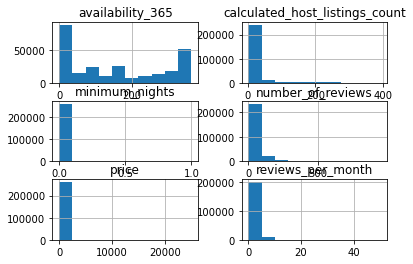

In [44]:
first_six = numbers[[ 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
first_six.hist()

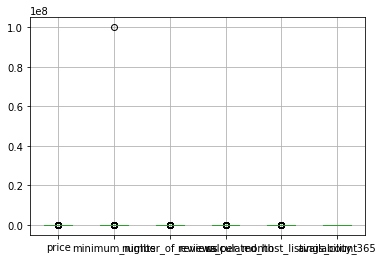

In [45]:
first_six.boxplot()
# We use boxplots to find outliers/outstanding data points that may be bad data
# Another example would be all zeroes which we would drop

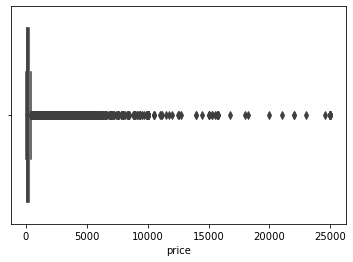

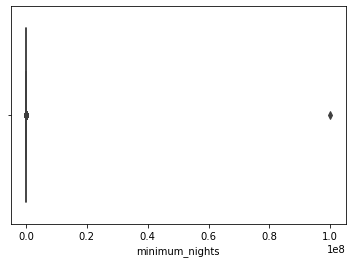

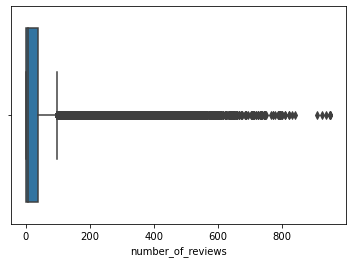

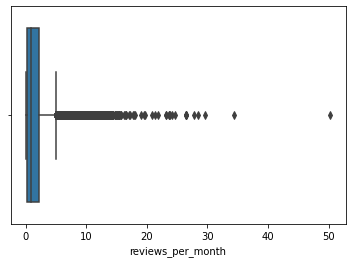

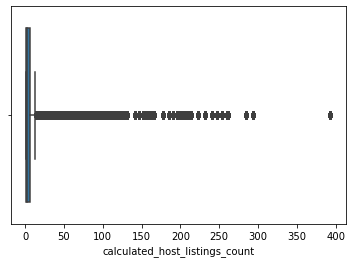

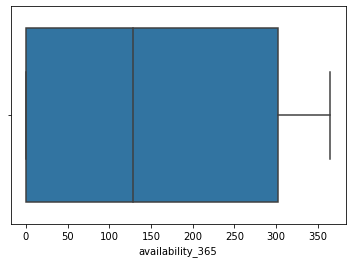

In [46]:
for i in first_six.columns:
    plt.figure()
    sns.boxplot(first_six[i])
   

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


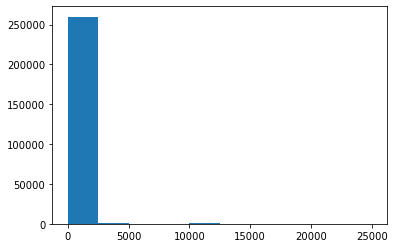

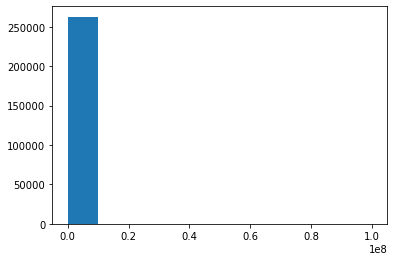

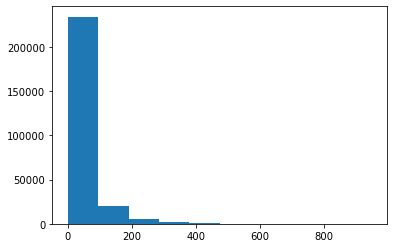

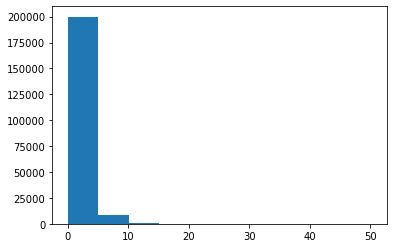

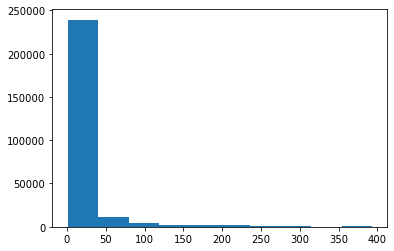

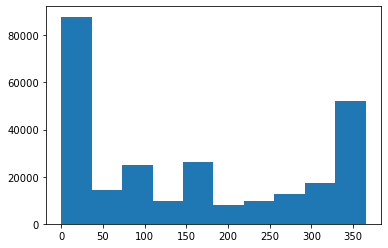

In [47]:
for i in first_six.columns:
    plt.figure()
    plt.hist(first_six[i])

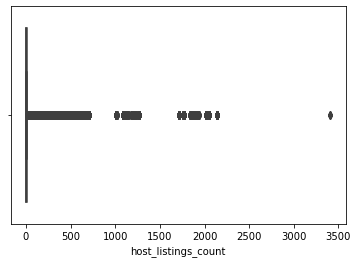

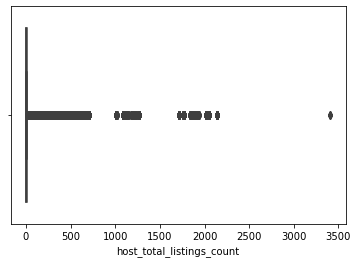

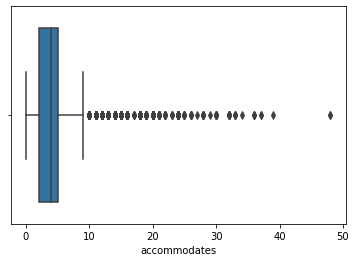

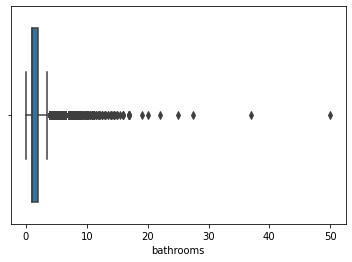

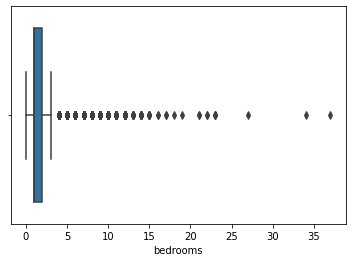

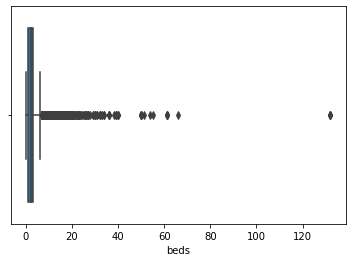

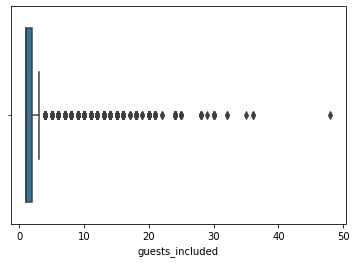

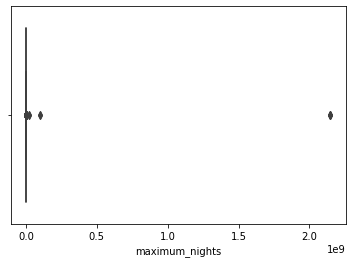

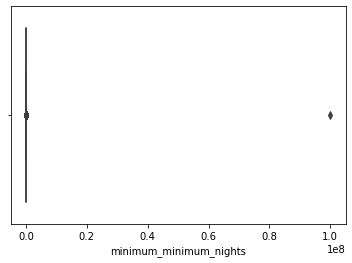

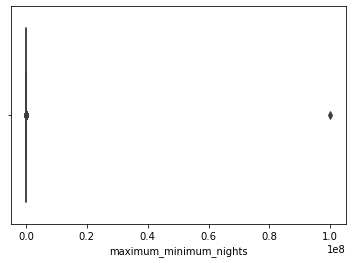

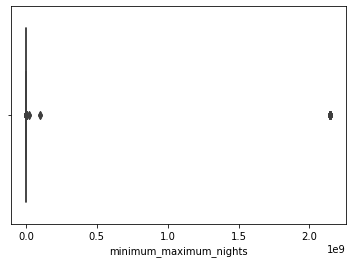

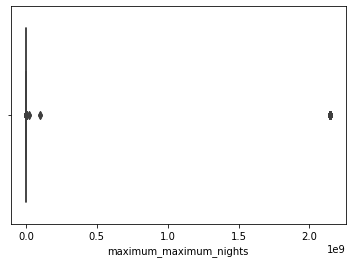

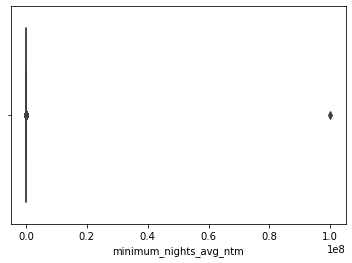

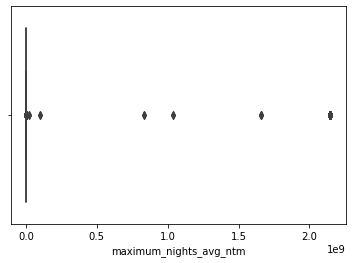

In [48]:
next_fifteen = numbers[['host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']]
for i in next_fifteen.columns:
    plt.figure()
    sns.boxplot(next_fifteen[i])

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


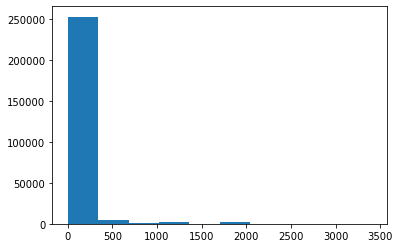

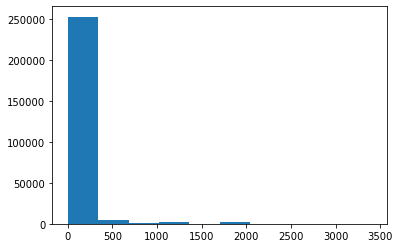

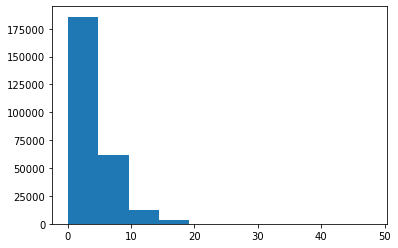

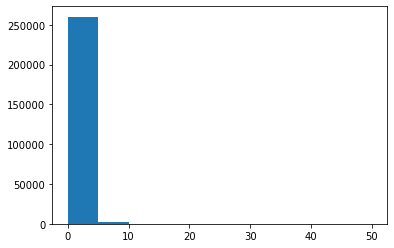

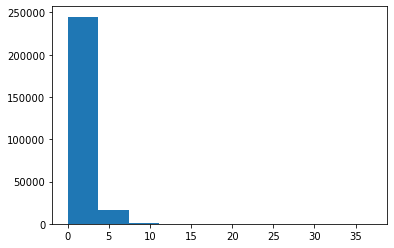

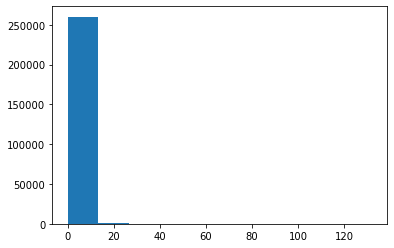

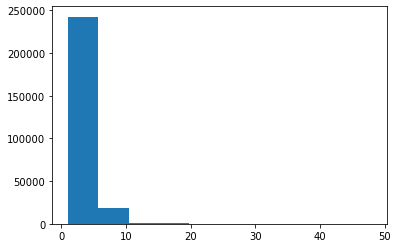

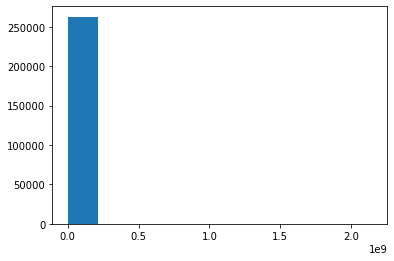

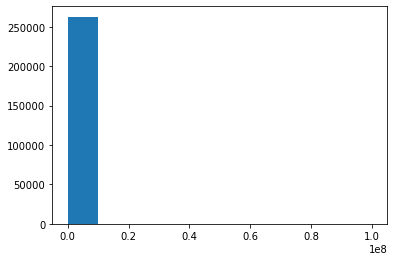

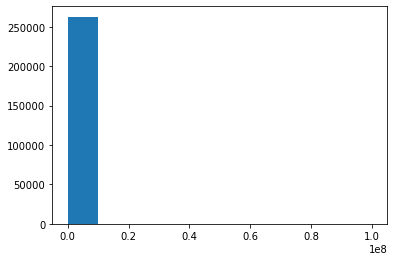

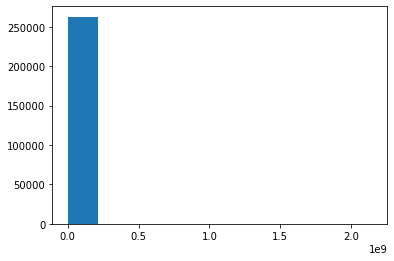

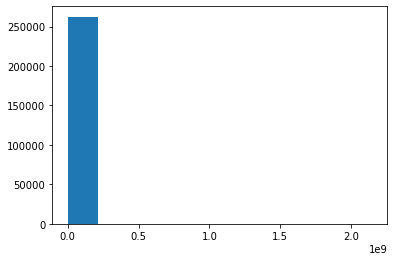

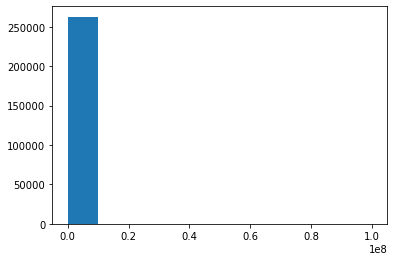

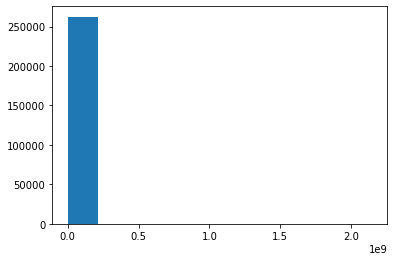

In [49]:
for i in next_fifteen.columns:
    plt.figure()
    plt.hist(next_fifteen[i])

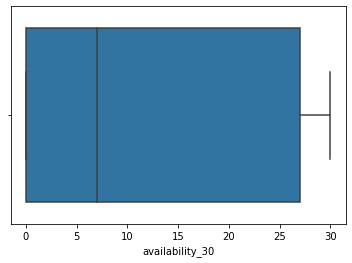

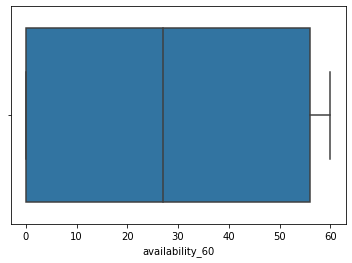

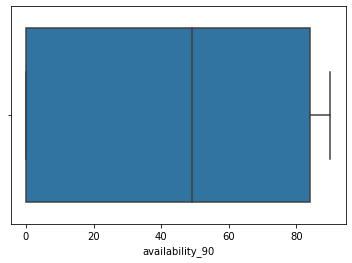

In [50]:
availability = numbers[['availability_30',
       'availability_60', 'availability_90']]
for i in availability.columns:
    plt.figure()
    sns.boxplot(availability[i])

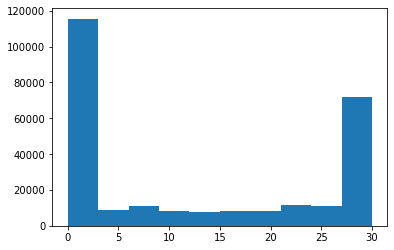

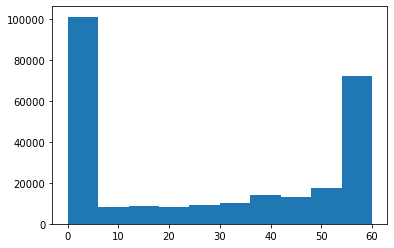

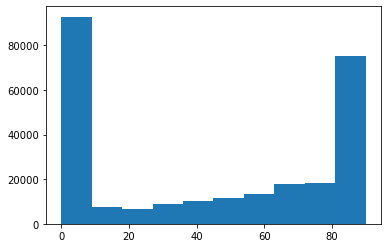

In [51]:
for i in availability.columns:
    plt.figure()
    plt.hist(availability[i])

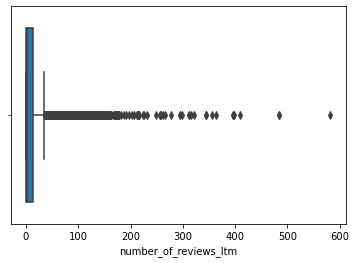

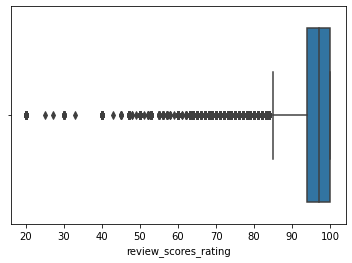

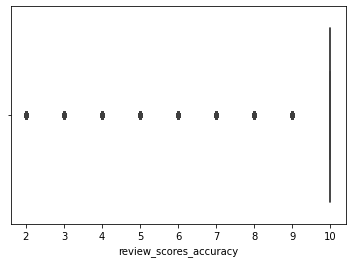

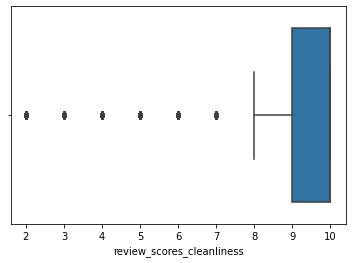

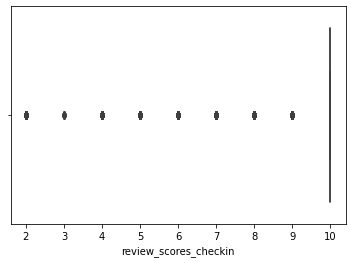

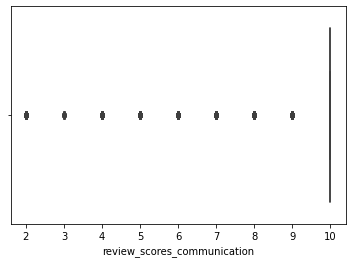

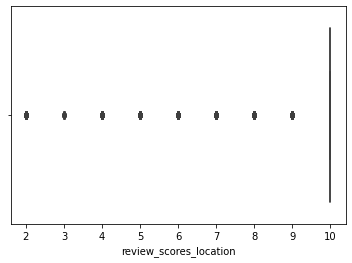

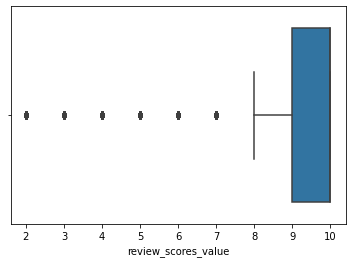

In [52]:
reviews = numbers[['number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]
for i in reviews.columns:
    plt.figure()
    sns.boxplot(reviews[i])

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brenden.lemay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


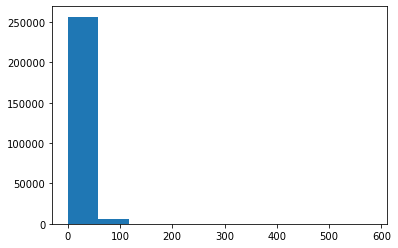

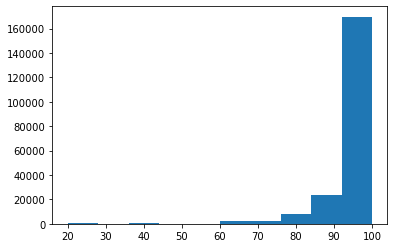

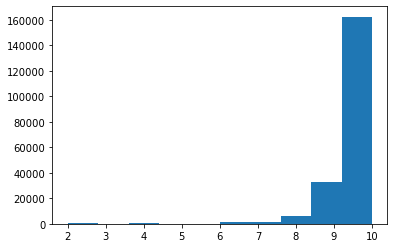

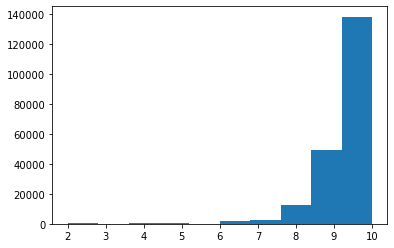

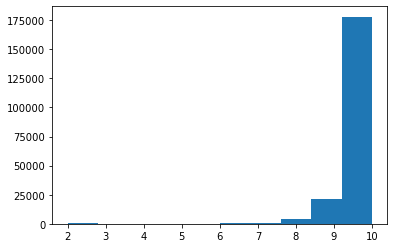

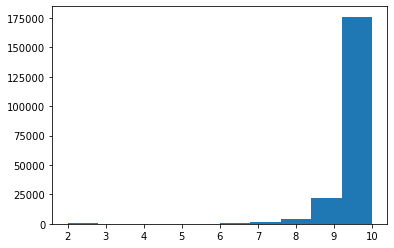

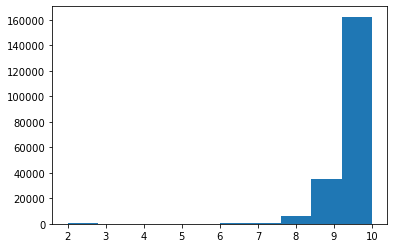

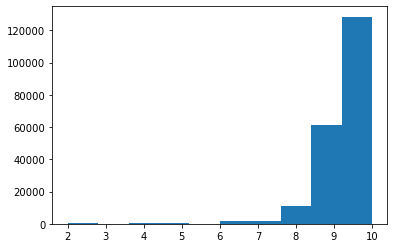

In [53]:
for i in reviews.columns:
    plt.figure()
    plt.hist(reviews[i])

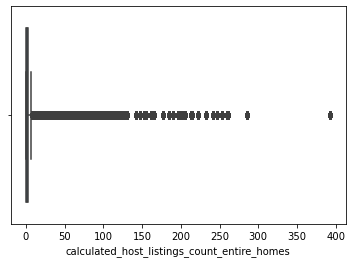

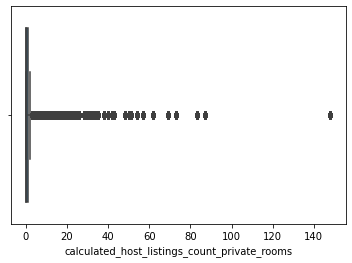

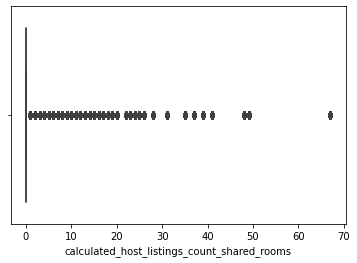

In [54]:
rooms = numbers[['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]
for i in rooms.columns:
    plt.figure()
    sns.boxplot(rooms[i])

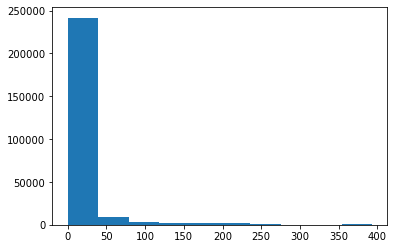

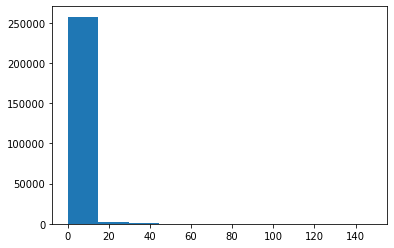

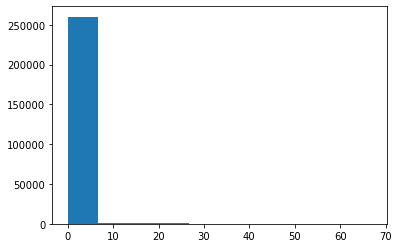

In [55]:
for i in rooms.columns:
    plt.figure()
    plt.hist(rooms[i])

# Hypothesis testing time

### CA and NY are both very expensive states and could quite possibly have overlap in ownership of listings. I hypothesize that the distributions of the prices amongst these two states are the same.
- H0 : CAmean -  NYmean = 0
- H1 : CAmean != NYmean

In [56]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [57]:
new_york = outer[outer['state']=='NY'].price

ny_x, ny_y = ecdf(new_york)

In [58]:
cali = outer[outer['state']=='CA'].price

ca_x, ca_y = ecdf(cali)

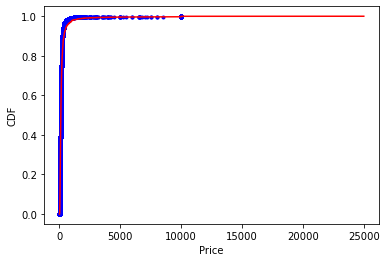

In [59]:
plt.plot(ny_x, ny_y, marker='.', linestyle='none', color='blue')
plt.plot(ca_x, ca_y, color='red')
plt.xlabel('Price')
plt.ylabel('CDF')
plt.show()

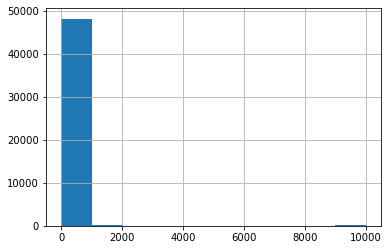

In [60]:
new_york.hist()

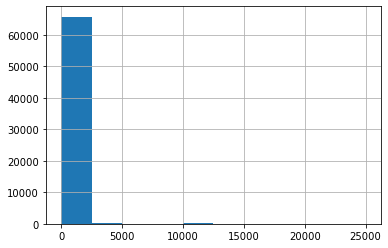

In [61]:
cali.hist()

In [62]:
ny_mean = np.mean(new_york)
ca_mean = np.mean(cali)

ny_var = np.var(new_york, ddof=1)
ca_var = np.var(cali,ddof=1)

ny_n= len(new_york)
ca_n= len(cali)

In [63]:
# Getting the t statistic and p value
statistic, pvalue = stats.ttest_ind(new_york, cali)
print('that t statistic is {} and the p value is {}.'.format(statistic, pvalue))

that t statistic is -18.889562638588526 and the p value is 1.8352371025918644e-79.


In [64]:
# Showcasing a different way to get the same answer. Essentially checking my math.
import statsmodels.api as sm
sm.stats.ztest(new_york, cali)

(-18.889562638588526, 1.3899251943572927e-79)

## Hypothesis Testing Conclusion
#### A t statistic of -18.89 shows that the area of our probability is -18.89 standard deviations away from the mean of the t distribution. The p value of 1.39e-79 means that the probability of getting this t statistic assuming the populations had no difference in means is 1.39e-79%. Since p is incredibly small, we can safely reject the null hypothesis stated above.

# Data Cleaning Time

### We know that our dataset contains some missing values, and a few extra characters that change the data types. Let's clean these up to make sure that we have a complete dataset for our machine learning portion

In [56]:
# Getting shape of df and comparing it to what would happen if we dropped all rows with missing values
print('orignal shape : ',outer.shape)
attempt_to_drop = outer.dropna()
print('after dropping rows with missing values : ',attempt_to_drop.shape)

orignal shape :  (262656, 93)
after dropping rows with missing values :  (3091, 93)


In [57]:
# Step 1. Call the variable corr_matrix
corr_matrix = outer.drop(['price'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [58]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'calculated_host_listings_count_entire_homes']


In [60]:
columns_to_drop = ['name','host_name','neighbourhood_group', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 
                   'neighborhood_overview','notes','transit', 'access', 'interaction','house_rules','host_picture_url',
                  'host_neighbourhood', 'host_verifications','street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'
                   ,'smart_location','zipcode', 'state', 'requires_license', 'license','jurisdiction_names']
outer.drop(columns=columns_to_drop,axis=1,inplace=True)

In [61]:
print('Reduced dataframe size: ',outer.shape)

Reduced dataframe size:  (262656, 67)


In [62]:
outer['host_is_superhost'].unique()

array(['t', 'f', nan], dtype=object)

In [63]:
outer['host_is_superhost'].fillna(0, inplace=True)

In [64]:
outer['host_is_superhost'].replace({'t':1,'f':0}, inplace=True)

In [65]:
outer.host_is_superhost.isnull().sum()

0

In [66]:
outer['is_location_exact'].unique()

array(['t', 'f'], dtype=object)

In [67]:
outer['is_location_exact'].replace({'t':1,'f':0}, inplace=True)

In [ ]:
# check what pd.get_dummies() does for numerical values

In [68]:
outer.drop(columns=['host_id'], axis=1, inplace=True)
outer.head()

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,experiences_offered,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,market,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,38585,28804,Private room,50,1,138,2020-02-16,1.17,1,9,none,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",NaN,NaN,93%,1,1.0,1.0,t,f,Asheville,North Carolina Mountains,1,House,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",$150.00,$0.00,1,$15.00,3,1,1,3,3,1.0,3.0,6 weeks ago,t,0,0,9,2020-06-25,10,2010-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,t,t,0,1,0
1,80905,28801,Entire home/apt,765,1,108,2020-03-15,1.01,11,323,none,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%,99%,1,14.0,14.0,t,f,Asheville,North Carolina Mountains,1,Loft,12,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$200.00,$0.00,6,$0.00,100,1,3,100,100,1.3,100.0,5 weeks ago,t,16,36,60,2020-06-25,13,2011-09-06,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,super_strict_60,f,f,11,0,0
2,108061,28801,Entire home/apt,75,30,89,2019-11-30,0.83,2,297,none,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within a few hours,100%,57%,0,2.0,2.0,t,t,Asheville,North Carolina Mountains,1,Apartment,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",$0.00,$0.00,2,$0.00,365,30,30,1125,1125,30.0,1125.0,6 weeks ago,t,0,0,22,2020-06-25,2,2011-09-21,90.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,2,0,0
3,155305,28806,Entire home/apt,99,1,244,2020-06-22,2.25,7,180,none,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,1,7.0,7.0,t,f,Asheville,North Carolina Mountains,1,Guesthouse,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",$0.00,$15.00,2,$12.00,365,1,1,7,365,1.0,178.7,3 weeks ago,t,22,52,82,2020-06-25,36,2011-07-31,90.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1,2,4
4,156805,28806,Private room,65,1,67,2020-01-01,0.63,7,0,none,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,1,7.0,7.0,t,f,Asheville,North Carolina Mountains,1,House,2,2.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,NaN,2,$12.00,365,1,1,365,365,1.0,365.0,5 weeks ago,t,0,0,0,2020-06-25,13,2011-09-20,90.0,10.0,9.0,10.0,9.0,10.0,9.0,t,f,moderate,f,f,1,2,4


In [90]:
# What do I do with columns that have null values.
# I'm aware I can drop nulls or impute them, but I don't understand how to evaluate the best version of imputing.

In [69]:
outer.drop(['host_about'], axis=1, inplace=True)

In [108]:
outer.drop(['last_review'],axis=1, inplace=True)

In [110]:
outer.bedrooms = outer.bedrooms.fillna(outer.bedrooms.mean())

In [215]:
#3 columns contain null values
null_cols = []
for col in outer:
    if outer[col].isna().sum()>0:
        null_cols.append([col, outer[col].isna().sum()])
print(len(null_cols))
print(null_cols)

2
[['bathrooms', 236], ['beds', 1776]]


In [211]:
outer.host_response_time.value_counts()

within an hour        118734
within a few hours     32684
within a day           20183
a few days or more      6998
Name: host_response_time, dtype: int64

In [214]:
outer.host_response_time = outer.host_response_time.fillna('within an hour')

In [ ]:
#from sklearn.impute import SimpleImputer
#imp_most_freq = SimpleImputer(missing_vaues=np.nan, strategy='most_frequent')
#imp_most_freq.fit(outer.host_response_time)

#### As we can see from the cell below, the host_acceptance_rate column contains strings as percentages and nan values. We will have to first fill the nan values before we can eliminate the percentage sign. Once that is taken care of, we can replace the missing values with the mean.

In [92]:
outer.host_acceptance_rate.unique()

array(['93%', '99%', '57%', nan, '100%', '94%', '83%', '0%', '71%', '86%',
       '95%', '91%', '69%', '90%', '97%', '74%', '81%', '89%', '92%',
       '98%', '67%', '75%', '88%', '54%', '96%', '80%', '85%', '58%',
       '62%', '87%', '78%', '73%', '59%', '77%', '50%', '63%', '84%',
       '20%', '76%', '43%', '33%', '82%', '70%', '79%', '38%', '14%',
       '65%', '60%', '64%', '25%', '44%', '40%', '51%', '39%', '26%',
       '31%', '49%', '56%', '66%', '45%', '46%', '42%', '6%', '30%',
       '72%', '27%', '68%', '53%', '24%', '12%', '47%', '61%', '52%',
       '29%', '41%', '34%', '21%', '55%', '35%', '18%', '36%', '48%',
       '3%', '32%', '19%', '37%', '23%', '5%', '17%', '10%', '11%', '28%',
       '22%', '9%', '8%', '13%', '7%', '15%', '4%', '16%', '2%'],
      dtype=object)

In [185]:
outer['host_acceptance_rate'] = outer['host_acceptance_rate'].fillna('')

In [186]:
outer['host_acceptance_rate'].unique()

array(['93%', '99%', '57%', '', '100%', '94%', '83%', '0%', '71%', '86%',
       '95%', '91%', '69%', '90%', '97%', '74%', '81%', '89%', '92%',
       '98%', '67%', '75%', '88%', '54%', '96%', '80%', '85%', '58%',
       '62%', '87%', '78%', '73%', '59%', '77%', '50%', '63%', '84%',
       '20%', '76%', '43%', '33%', '82%', '70%', '79%', '38%', '14%',
       '65%', '60%', '64%', '25%', '44%', '40%', '51%', '39%', '26%',
       '31%', '49%', '56%', '66%', '45%', '46%', '42%', '6%', '30%',
       '72%', '27%', '68%', '53%', '24%', '12%', '47%', '61%', '52%',
       '29%', '41%', '34%', '21%', '55%', '35%', '18%', '36%', '48%',
       '3%', '32%', '19%', '37%', '23%', '5%', '17%', '10%', '11%', '28%',
       '22%', '9%', '8%', '13%', '7%', '15%', '4%', '16%', '2%'],
      dtype=object)

In [192]:
outer['host_acceptance_rate'] = outer['host_acceptance_rate'].str.replace('%','')
outer['host_acceptance_rate'].unique()

array(['93', '99', '57', '', '100', '94', '83', '0', '71', '86', '95',
       '91', '69', '90', '97', '74', '81', '89', '92', '98', '67', '75',
       '88', '54', '96', '80', '85', '58', '62', '87', '78', '73', '59',
       '77', '50', '63', '84', '20', '76', '43', '33', '82', '70', '79',
       '38', '14', '65', '60', '64', '25', '44', '40', '51', '39', '26',
       '31', '49', '56', '66', '45', '46', '42', '6', '30', '72', '27',
       '68', '53', '24', '12', '47', '61', '52', '29', '41', '34', '21',
       '55', '35', '18', '36', '48', '3', '32', '19', '37', '23', '5',
       '17', '10', '11', '28', '22', '9', '8', '13', '7', '15', '4', '16',
       '2'], dtype=object)

In [193]:
outer['host_acceptance_rate']=outer['host_acceptance_rate'].replace('',np.nan).astype('float')

In [196]:
outer['host_acceptance_rate']  = outer['host_acceptance_rate'].fillna(outer['host_acceptance_rate'].mean())

In [197]:
outer['host_response_rate'].unique()

array([ 93.01394745, 100.        ,  87.        ,  80.        ,
        83.        ,  93.        ,   0.        ,  50.        ,
        89.        ,  97.        ,  10.        ,  63.        ,
        99.        ,  95.        ,  90.        ,  67.        ,
        82.        ,  75.        ,  60.        ,  33.        ,
        86.        ,  70.        ,  13.        ,  92.        ,
        96.        ,  65.        ,  85.        ,  71.        ,
        98.        ,  94.        ,  88.        ,  40.        ,
        57.        ,  30.        ,  78.        ,  91.        ,
         9.        ,  52.        ,  19.        ,  25.        ,
        73.        ,  72.        ,  47.        ,  76.        ,
        55.        ,  61.        ,  84.        ,  62.        ,
        20.        ,  43.        ,  38.        ,  56.        ,
        68.        ,  53.        ,  79.        ,  39.        ,
        81.        ,  77.        ,  16.        ,  64.        ,
        14.        ,  44.        ,  46.        ,  58.  

In [198]:
outer['host_response_rate']  = outer['host_response_rate']/100

In [199]:
outer['host_response_rate'].unique()

array([0.93013947, 1.        , 0.87      , 0.8       , 0.83      ,
       0.93      , 0.        , 0.5       , 0.89      , 0.97      ,
       0.1       , 0.63      , 0.99      , 0.95      , 0.9       ,
       0.67      , 0.82      , 0.75      , 0.6       , 0.33      ,
       0.86      , 0.7       , 0.13      , 0.92      , 0.96      ,
       0.65      , 0.85      , 0.71      , 0.98      , 0.94      ,
       0.88      , 0.4       , 0.57      , 0.3       , 0.78      ,
       0.91      , 0.09      , 0.52      , 0.19      , 0.25      ,
       0.73      , 0.72      , 0.47      , 0.76      , 0.55      ,
       0.61      , 0.84      , 0.62      , 0.2       , 0.43      ,
       0.38      , 0.56      , 0.68      , 0.53      , 0.79      ,
       0.39      , 0.81      , 0.77      , 0.16      , 0.64      ,
       0.14      , 0.44      , 0.46      , 0.58      , 0.04      ,
       0.37      , 0.17      , 0.69      , 0.22      , 0.21      ,
       0.45      , 0.31      , 0.74      , 0.29      , 0.18   

In [166]:
outer['host_response_rate'] = outer['host_response_rate'].fillna('')

In [180]:
outer['host_response_rate'].unique()

array([nan, '100', '87', '80', '83', '93', '0', '50', '89', '97', '10',
       '63', '99', '95', '90', '67', '82', '75', '60', '33', '86', '70',
       '13', '92', '96', '65', '85', '71', '98', '94', '88', '40', '57',
       '30', '78', '91', '9', '52', '19', '25', '73', '72', '47', '76',
       '55', '61', '84', '62', '20', '43', '38', '56', '68', '53', '79',
       '39', '81', '77', '16', '64', '14', '44', '46', '58', '4', '37',
       '17', '69', '22', '21', '45', '31', '74', '29', '18', '51', '1',
       '66', '3', '6', '7', '2', '11', '23', '15', '27', '26', '41', '36',
       '54', '12', '59', '24', '5', '8', '42', '48', '35', '32', '34',
       '28'], dtype=object)

In [182]:
outer['host_response_rate']=outer['host_response_rate'].replace('',np.nan).astype('float')

In [183]:
outer['host_response_rate']  = outer['host_response_rate'].fillna(outer['host_response_rate'].mean())


In [200]:
outer['host_response_rate'] = outer['host_response_rate']/100

In [72]:
outer.dropna(subset =['host_since','host_location','host_listings_count','host_total_listings_count'
                      ,'host_has_profile_pic','host_identity_verified'], inplace=True)

In [73]:
outer[outer['city'].isnull() & outer['market'].isnull()]

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,market,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms


In [74]:
outer['market'].fillna(outer['city'],inplace=True)

In [75]:
outer['city'].fillna(outer['market'],inplace=True)

In [113]:
outer['city'].isnull().sum()

0

In [77]:
# Replacing these missing entries with 'f' for False seems safe
outer['host_has_profile_pic']=outer['host_has_profile_pic'].replace({np.nan:'f'})
outer['host_identity_verified']=outer['host_identity_verified'].fillna('f')

In [78]:
outer['host_identity_verified'].unique()

array(['f', 't'], dtype=object)

In [80]:
outer.bed_type = outer.bed_type.fillna(outer.bed_type.value_counts().index[0])

In [94]:
outer.bedrooms.fillna(outer.bedrooms.mean(),inplace=True)

In [158]:
pd.__version__


'1.0.1'

In [208]:
true_bathroom_mean = outer.groupby('bedrooms')[['bedrooms','bathrooms']].mean()
outer.groupby('bedrooms')[['bedrooms','bathrooms']].head()
outer.bathrooms = outer.bathrooms.fillna(true_bathroom_mean['bathrooms'])

In [146]:
bedroom_grouped = outer.groupby('bedrooms')['bathrooms', 'beds']
bedroom_grouped.head()

C:\Users\brenden.lemay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bathrooms,beds
0,1.0,2.0
1,2.0,6.0
2,1.0,1.0
3,1.0,1.0
4,2.5,1.0
...,...,...
158204,17.0,61.0
222004,6.0,51.0
226570,20.0,16.0
244128,10.0,23.0


In [84]:
replace_zeroes = ['reviews_per_month','security_deposit', 'cleaning_fee'
                  , 'first_review', 'review_scores_rating', 'review_scores_accuracy'
                  , 'review_scores_cleanliness','review_scores_checkin','review_scores_communication'
                  , 'review_scores_location', 'review_scores_value']
for idx, col in enumerate(replace_zeroes):
    outer[col].fillna(0,inplace=True)

In [209]:
outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261944 entries, 0 to 262655
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            261944 non-null  int64  
 1   neighbourhood                                 261944 non-null  object 
 2   room_type                                     261944 non-null  object 
 3   price                                         261944 non-null  int64  
 4   minimum_nights                                261944 non-null  int64  
 5   number_of_reviews                             261944 non-null  int64  
 6   reviews_per_month                             261944 non-null  float64
 7   calculated_host_listings_count                261944 non-null  int64  
 8   availability_365                              261944 non-null  int64  
 9   experiences_offered                           26

# Machine Learning Time
### We know that we will be using a supervised regression machine learning algorithm to make a prediction for price. This is because price is a continuous variable and we have labelled data. 

In [148]:
# Using from skelarn.preprocessng import Imputer throws an error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#imp = SimpleImputer(missing_values='NaN', strategy = 'most_frequent')
X = outer.drop(columns='price', axis=1)
y = outer.price
#Create training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [ ]:
# Which regression technique do I select?
# LinearRegression?
# RandomForest Regression

In [ ]:
# How do we cross validate? 
# GridSearchCv 
max_depth = [5,10,15], min_samples_leaf = [5,100]

In [ ]:
# How do I judge one algorithm against the next? R^2 doesn't make any sense to me neither does roc/auc
# Product managers will not understand r^2. mean abosulte percentage error is the metric we want to go with

''' 
Step 1 drop columns that make sense to drop
Step 2 impute missing values for columns. Group where it makes sense to otherwise do it individually
Step 3 one hot encode categoricals with pd.get_dummies()
Step 4 fit and evaluate LinearRegression to establish a baseline
Step 5 use GridSearchCV on a RandomForestRegressor to find best random forest regressor and use that model as the final
'''